<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/file%20skripsinya%20fara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [17]:
from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

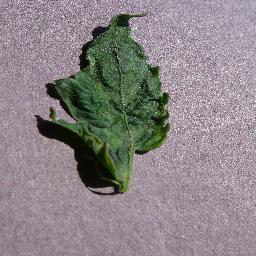

In [55]:
img = Image.open('/content/D3.jpg')
img

In [56]:
img.size

(256, 256)

In [57]:
img_array = np.array(img)
img_array

array([[[172, 155, 171],
        [149, 132, 148],
        [166, 149, 165],
        ...,
        [157, 149, 164],
        [168, 160, 175],
        [168, 160, 175]],

       [[167, 150, 166],
        [178, 161, 177],
        [195, 178, 194],
        ...,
        [170, 162, 177],
        [170, 162, 177],
        [160, 152, 167]],

       [[143, 126, 142],
        [149, 132, 148],
        [163, 146, 162],
        ...,
        [181, 173, 188],
        [180, 172, 187],
        [167, 159, 174]],

       ...,

       [[144, 128, 138],
        [141, 125, 135],
        [141, 125, 135],
        ...,
        [145, 132, 142],
        [143, 130, 140],
        [149, 136, 146]],

       [[140, 124, 134],
        [139, 123, 133],
        [142, 126, 136],
        ...,
        [153, 140, 150],
        [138, 125, 135],
        [148, 135, 145]],

       [[137, 121, 131],
        [137, 121, 131],
        [142, 126, 136],
        ...,
        [155, 142, 152],
        [166, 153, 163],
        [148, 135, 145]]

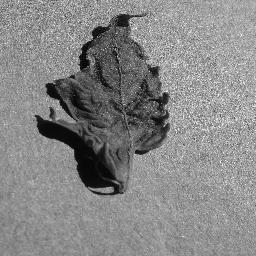

In [58]:
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
imgGray

In [59]:
imgG_array = np.array(imgGray)
imgG_array

array([[162, 139, 156, ..., 153, 164, 164],
       [157, 168, 185, ..., 166, 166, 156],
       [133, 139, 153, ..., 177, 176, 163],
       ...,
       [134, 131, 131, ..., 137, 135, 141],
       [130, 129, 132, ..., 145, 130, 140],
       [127, 127, 132, ..., 147, 158, 140]], dtype=uint8)

In [60]:
np.min(imgG_array),np.max(imgG_array)

(0, 253)

## FIS (Fuzzy Information System)

Pada bagian ini meliputi: 
- Representasi citra grayscale ke dalam fungsi keanggotaan fuzzy
- Mengkuantifikasi ketidakpastian yang dihasilkan akibat kekurangan informasi menggunakan entropi

## MF linier naik

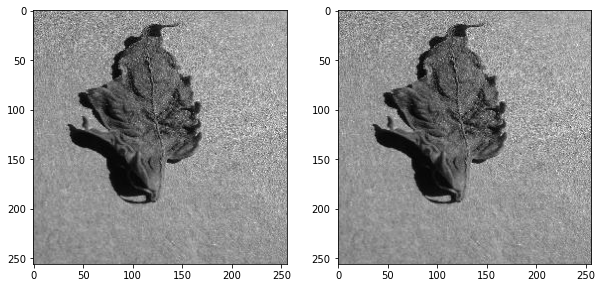

In [67]:
def fungsi_linier(x):
  a = -0.01;
  b = 253.1;
  miu = (x - a)/(b-a)
  return miu

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(imgG_array/256)
plt.subplot(122)
plt.imshow(fungsi_linier(imgG_array/256))
plt.show()

In [68]:
img_fuzzy = fungsi_linier(imgG_array)
img_fuzzy

array([[0.64007744, 0.54920785, 0.61637233, ..., 0.60451977, 0.64797914,
        0.64797914],
       [0.62032318, 0.66378255, 0.73094702, ..., 0.65588084, 0.65588084,
        0.61637233],
       [0.52550275, 0.54920785, 0.60451977, ..., 0.69934021, 0.69538936,
        0.64402829],
       ...,
       [0.5294536 , 0.51760104, 0.51760104, ..., 0.54130615, 0.53340445,
        0.55710956],
       [0.51365019, 0.50969934, 0.52155189, ..., 0.57291296, 0.51365019,
        0.55315871],
       [0.50179764, 0.50179764, 0.52155189, ..., 0.58081467, 0.62427403,
        0.55315871]])

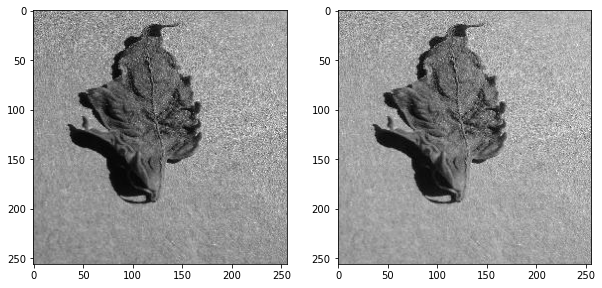

In [69]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(img_fuzzy/256)
plt.subplot(122)
plt.imshow(entropi(img_fuzzy/256))
plt.show()

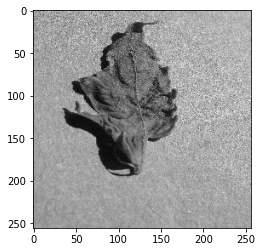

In [70]:
fig = plt.imshow(entropi(img_fuzzy/256))

In [33]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

In [72]:
FEM = entropi(img_fuzzy)
FEM

array([[0.4120061 , 0.47483184, 0.43030555, ..., 0.43896512, 0.40562245,
        0.40562245],
       [0.42734564, 0.39243979, 0.33050592, ..., 0.39909979, 0.39909979,
        0.43030555],
       [0.4877873 , 0.47483184, 0.43896512, ..., 0.36081314, 0.36445851,
        0.40883176],
       ...,
       [0.48573336, 0.49176632, 0.49176632, ..., 0.47931756, 0.48363687,
        0.4701821 ],
       [0.49369073, 0.49557129, 0.4897984 , ..., 0.4603998 , 0.49369073,
        0.47252732],
       [0.49919954, 0.49919954, 0.4897984 , ..., 0.4552717 , 0.42434942,
        0.47252732]])

In [73]:
maxcr = np.max(FEM)
mincr = np.min(FEM)
avgcr = (maxcr + mincr)/2
print(maxcr, mincr, avgcr)

0.5307375144753225 0.0005698747618278882 0.2656536946185752


In [15]:
FEM.shape, FEM.dtype

((225, 225), dtype('float64'))

## MF segitiga dan linier


## MF Sigmoid

In [ ]:
def sig(x,a,b,c):
    if x < a:
      miu = 0
    elif a < x < b:
      miu =  2. * ((x - a)** 2. / (b - a)) ** 2.
    elif b < x < c:
      miu = 1 - 2. * ((x - b) / (b - a)) ** 2.
    else:
      miu = 1
    return miu

In [ ]:
sig(2,1,5,7)

0.125

In [ ]:
def sigf(x,a,b,c):
    if x <= a:
      miu = 0
    elif a <= x <= b:
      miu =  (x - a)**2 / ((b - a)*(c - a))
    elif b <= x <= c:
      miu = 1 - ((x - c)**2) /(c - b)*(c - a)
    else:
      miu = 1
    return miu

In [ ]:
sigf(6,1,5,6)

1.0

# K-Means Klastering

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [76]:
image = cv2.imread('/content/Screenshot 2022-07-29 at 20.32.39.png')
print(image.dtype, image.shape)

uint8 (434, 434, 3)


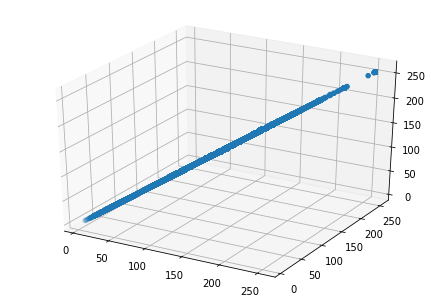

In [83]:
r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [85]:
pixel_vals = fig.reshape((-1,2))
print(pixel_vals.dtype, pixel_vals.shape)

AttributeError: ignored

In [86]:
Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

NameError: ignored

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

[[1]
 [0]
 [0]
 ...
 [1]
 [2]
 [2]]


In [ ]:
print(center)

[[ 74.90644  74.90644  74.90644]
 [149.93405 149.93405 149.93405]
 [124.82388 124.82388 124.82388]]


In [ ]:
center = np.uint8(center)
center

array([[ 74,  74,  74],
       [149, 149, 149],
       [124, 124, 124]], dtype=uint8)

In [ ]:
segmented_data = center[label.flatten()]
segmented_data

array([[149, 149, 149],
       [ 74,  74,  74],
       [ 74,  74,  74],
       ...,
       [149, 149, 149],
       [124, 124, 124],
       [124, 124, 124]], dtype=uint8)

In [ ]:
segmented_image = segmented_data.reshape((image.shape))
segmented_image

array([[[149, 149, 149],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [124, 124, 124],
        [149, 149, 149]],

       ...,

       [[124, 124, 124],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[124, 124, 124],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[124, 124, 124],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [124, 124, 124],
        [124, 124, 124]]

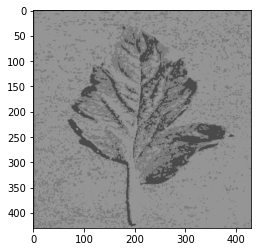

In [ ]:
plt.imshow(segmented_image)

In [ ]:
from PIL import Image
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

# Evaluasi Performa 

In [ ]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/Tomato_Tomato_mosaic_virus15.jpg")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

ValueError: ignored